In [1]:
# Install open Dataset
!pip install opendatasets
# Install pandas
!pip install pandas
# Install kaggle API
!pip install -q kaggle

In [2]:
from google.colab import files
import os
import shutil

# Unggah file kaggle.json
print("Unggah file 'kaggle.json' Anda yang diunduh dari akun Kaggle.")
uploaded = files.upload()

# Membuat folder .kaggle jika belum ada
kaggle_dir = '/root/.kaggle'
os.makedirs(kaggle_dir, exist_ok=True)

# Memindahkan file kaggle.json ke folder .kaggle
uploaded_file = list(uploaded.keys())[0]  # Mengambil nama file yang diunggah
shutil.move(uploaded_file, os.path.join(kaggle_dir, 'kaggle.json'))

# Mengatur izin untuk file kaggle.json
os.chmod(os.path.join(kaggle_dir, 'kaggle.json'), 0o600)

print("File kaggle.json berhasil dipindahkan dan izin telah diatur.")


Unggah file 'kaggle.json' Anda yang diunduh dari akun Kaggle.


Saving kaggle (3).json to kaggle (3).json
File kaggle.json berhasil dipindahkan dan izin telah diatur.


In [3]:
# Unduh dataset menggunakan Kaggle API
!kaggle datasets download -d sobhanmoosavi/us-accidents

Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
us-accidents.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
import zipfile
import os

# Ekstrak file zip
with zipfile.ZipFile('us-accidents.zip', 'r') as zip_ref:
    zip_ref.extractall('us-accidents')

# Pastikan nama file setelah ekstraksi
extracted_files = os.listdir('us-accidents')  # Lihat daftar file yang diekstrak
print(f"File yang diekstrak: {extracted_files}")

# Jika file yang diekstrak bernama 'US_Accidents_March23.csv', maka gunakan nama itu
file_path = 'us-accidents/US_Accidents_March23.csv'

# Import pandas
import pandas as pd

# Tentukan jumlah baris yang ingin dibaca
file_path = 'us-accidents/US_Accidents_March23.csv'
data = pd.read_csv(file_path, nrows=150000)

# Cek jumlah baris dan kolom
print(f"Jumlah data: {data.shape[0]} baris, {data.shape[1]} kolom")

File yang diekstrak: ['US_Accidents_March23.csv']
Jumlah data: 150000 baris, 46 kolom


In [17]:
# Menampilkan beberapa baris dataset
print(data.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [18]:
# Menampilkan informasi umum tentang dataset
print(data.info())

# Menampilkan statistik deskriptif dari dataset
print(data.describe())

# Cek missing values
print("Missing values per kolom:")
print(data.isnull().sum())

# Cek duplikasi
print(f"Jumlah duplikasi: {data.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     150000 non-null  object 
 1   Source                 150000 non-null  object 
 2   Severity               150000 non-null  int64  
 3   Start_Time             150000 non-null  object 
 4   End_Time               150000 non-null  object 
 5   Start_Lat              150000 non-null  float64
 6   Start_Lng              150000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           150000 non-null  float64
 10  Description            150000 non-null  object 
 11  Street                 150000 non-null  object 
 12  City                   149986 non-null  object 
 13  County                 150000 non-null  object 
 14  State                  150000 non-nu

In [21]:
# Handle missing values
# Isi Weather_Condition dengan mode
data['Weather_Condition'].fillna(data['Weather_Condition'].mode()[0], inplace=True)

# Isi Precipitation(in) dengan 0
data['Precipitation(in)'].fillna(0, inplace=True)

# Isi Wind_Chill(F) dengan rata-rata
data['Wind_Chill(F)'].fillna(data['Wind_Chill(F)'].mean(), inplace=True)

# Mengganti missing values dengan 0 pada End_Lat dan End_Lng
data['End_Lat'].fillna(0, inplace=True)
data['End_Lng'].fillna(0, inplace=True)

# Mengganti missing values pada kolom Astronomical_Twilight, Nautical_Twilight, Civil_Twilight, Sunrise_Sunset dengan nilai modus
data['Astronomical_Twilight'].fillna(data['Astronomical_Twilight'].mode()[0], inplace=True)
data['Nautical_Twilight'].fillna(data['Nautical_Twilight'].mode()[0], inplace=True)
data['Civil_Twilight'].fillna(data['Civil_Twilight'].mode()[0], inplace=True)
data['Sunrise_Sunset'].fillna(data['Sunrise_Sunset'].mode()[0], inplace=True)

# Mengganti missing values pada kolom Wind_Speed(mph) dengan rata-rata
data['Wind_Speed(mph)'].fillna(data['Wind_Speed(mph)'].mean(), inplace=True)

# Mengganti missing values pada kolom Wind_Direction dengan modus
data['Wind_Direction'].fillna(data['Wind_Direction'].mode()[0], inplace=True)

# Mengganti missing values pada kolom Visibility(mi) dengan rata-rata
data['Visibility(mi)'].fillna(data['Visibility(mi)'].mean(), inplace=True)

# Mengganti missing values pada kolom Pressure(in) dengan rata-rata
data['Pressure(in)'].fillna(data['Pressure(in)'].mean(), inplace=True)

# Mengganti missing values pada kolom Humidity(%) dengan rata-rata
data['Humidity(%)'].fillna(data['Humidity(%)'].mean(), inplace=True)

# Mengganti missing values pada kolom Temperature(F) dengan rata-rata
data['Temperature(F)'].fillna(data['Temperature(F)'].mean(), inplace=True)

# Mengonversi Weather_Timestamp ke format datetime dan mengganti missing values dengan median
data['Weather_Timestamp'] = pd.to_datetime(data['Weather_Timestamp'], errors='coerce')
data['Weather_Timestamp'].fillna(data['Weather_Timestamp'].median(), inplace=True)

# Mengganti missing values pada kolom Airport_Code dengan modus
data['Airport_Code'].fillna(data['Airport_Code'].mode()[0], inplace=True)

# Mengganti missing values pada kolom Timezone dengan modus
data['Timezone'].fillna(data['Timezone'].mode()[0], inplace=True)

# Mengganti missing values pada kolom Zipcode dengan modus
data['Zipcode'].fillna(data['Zipcode'].mode()[0], inplace=True)

# Mengganti missing values pada kolom City dengan modus
data['City'].fillna(data['City'].mode()[0], inplace=True)

# Cek kembali apakah missing values sudah ditangani
print("Jumlah missing values per kolom setelah pengisian:")
print(data.isnull().sum())


<ipython-input-21-579e46046e70>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Precipitation(in)'].fillna(0, inplace=True)
<ipython-input-21-579e46046e70>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

Jumlah missing values per kolom setelah pengisian:
ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Rail

In [20]:
# Menampilkan jumlah data setelah pembersihan
print(f"Jumlah data setelah pembersihan: {data.shape[0]}")

Jumlah data setelah pembersihan: 150000


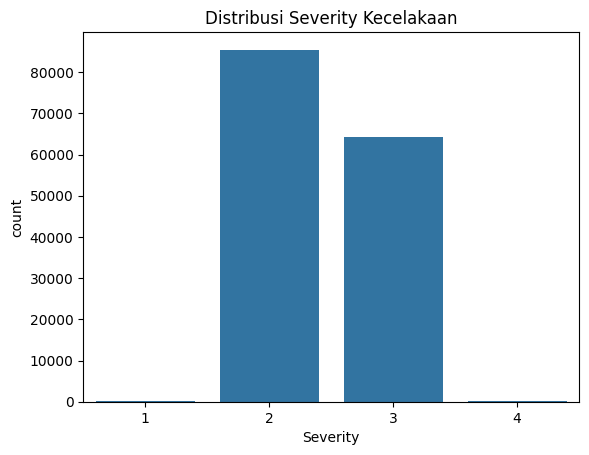

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi severity
sns.countplot(x='Severity', data=data)
plt.title('Distribusi Severity Kecelakaan')
plt.show()


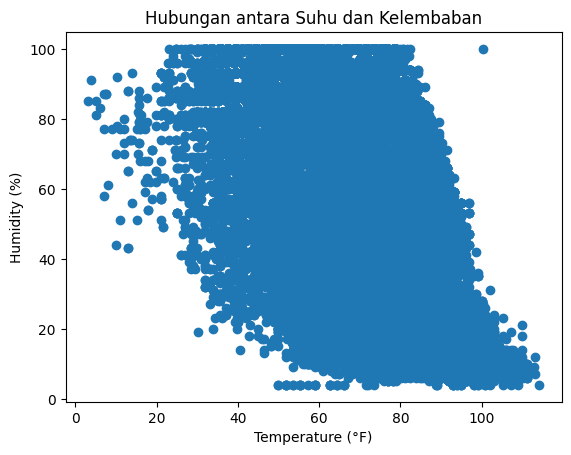

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hubungan antara suhu dan kelembaban
plt.scatter(data['Temperature(F)'], data['Humidity(%)'])
plt.xlabel('Temperature (°F)')
plt.ylabel('Humidity (%)')
plt.title('Hubungan antara Suhu dan Kelembaban')
plt.show()

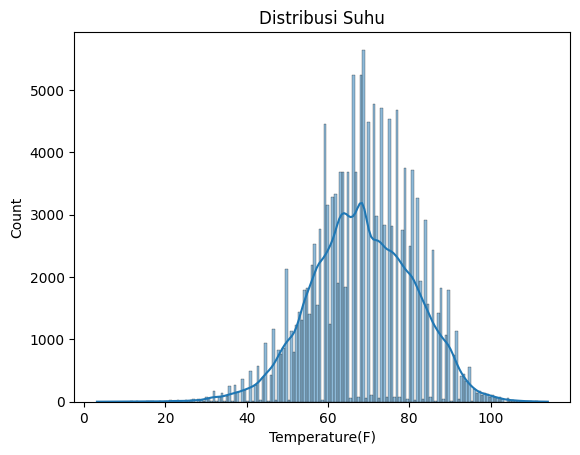

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi suhu
sns.histplot(data['Temperature(F)'], kde=True)
plt.title('Distribusi Suhu')
plt.show()

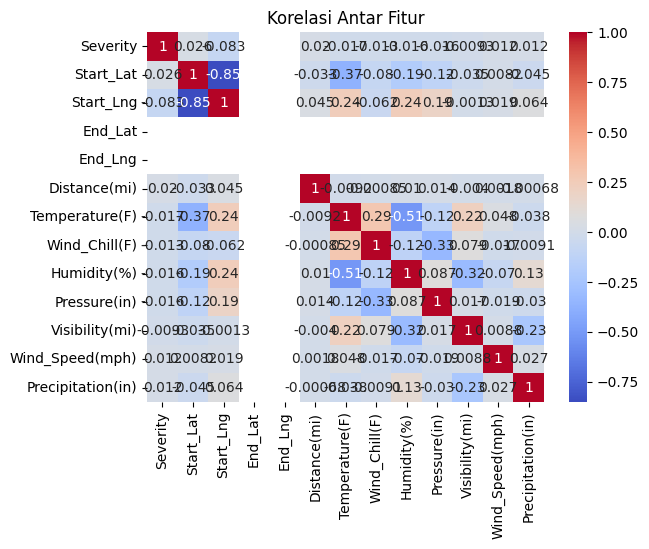

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi korelasi antar fitur
correlation_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

In [27]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.clustering import KMeans
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator, MulticlassClassificationEvaluator
from pyspark.sql.functions import to_timestamp, month, dayofmonth, hour, dayofweek, when

# Membuat SparkSession
spark = SparkSession.builder.appName("USAccidents").getOrCreate()

# Mengimpor dataset
file_path = 'us-accidents/US_Accidents_March23.csv'
data = spark.read.csv(file_path, header=True, inferSchema=True)

# Mengonversi kolom Start_Time ke timestamp
data = data.withColumn("Start_Time", to_timestamp("Start_Time", "yyyy-MM-dd HH:mm:ss"))

# Menambahkan kolom waktu
data = data.withColumn("Month", month("Start_Time")) \
           .withColumn("Day", dayofmonth("Start_Time")) \
           .withColumn("Hour", hour("Start_Time")) \
           .withColumn("Weekday", dayofweek("Start_Time"))

# Memilih kolom untuk analisis
feature_columns = ['Month', 'Day', 'Hour', 'Weekday', 'Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features", handleInvalid="skip")
data = assembler.transform(data)

# Sampling data (ambil 10% data secara acak)
sampled_data = data.sample(fraction=0.1, seed=42)

# Bagi data yang telah disampling menjadi training dan testing
train_data, test_data = sampled_data.randomSplit([0.8, 0.2], seed=42)

# Cache data training dalam memori
train_data.cache()

# Pengurangan dimensi fitur dengan PCA (5 komponen utama)
pca = PCA(k=5, inputCol="features", outputCol="pcaFeatures")
pcaModel = pca.fit(train_data)
train_data = pcaModel.transform(train_data)
test_data = pcaModel.transform(test_data)

# Model 1: Linear Regression (gunakan pcaFeatures sebagai fitur)
lr = LinearRegression(featuresCol="pcaFeatures", labelCol="Severity")

# Optimasi parameter model dengan TrainValidationSplit (rentang parameter lebih sempit)
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.001]) \
    .addGrid(lr.elasticNetParam, [0.5, 1.0]) \
    .build()

tvs = TrainValidationSplit(estimator=lr,
                           estimatorParamMaps=paramGrid,
                           evaluator=RegressionEvaluator(labelCol="Severity", predictionCol="prediction", metricName="rmse"),
                           trainRatio=0.8)

# Latih model dengan TrainValidationSplit
model = tvs.fit(train_data)

# Dapatkan model terbaik
bestModel = model.bestModel

# Memprediksi dan mengevaluasi model regresi linier
lr_predictions = bestModel.transform(test_data)
lr_evaluator = RegressionEvaluator(labelCol="Severity", predictionCol="prediction", metricName="rmse")
lr_rmse = lr_evaluator.evaluate(lr_predictions)
print(f"Linear Regression (Hyperparameter Tuning) - RMSE: {lr_rmse}")

# Model 2: Logistic Regression (Klasifikasi)
# Mengonversi label menjadi biner untuk klasifikasi (misalnya, 0 untuk tidak serius, 1 untuk serius)
data = data.withColumn("Severity_Label", when(data["Severity"] > 2, 1).otherwise(0))

# Terapkan PCA pada data sebelum dibagi untuk klasifikasi
data_pca = pcaModel.transform(data) # Terapkan PCA transformasi pada keseluruhan data

# Membagi data yang telah di transformasi PCA menjadi training dan testing untuk klasifikasi
train_data_clf, test_data_clf = data_pca.randomSplit([0.8, 0.2], seed=42)

# Model Logistic Regression
log_reg = LogisticRegression(featuresCol="pcaFeatures", labelCol="Severity_Label")
log_reg_model = log_reg.fit(train_data_clf)

# Memprediksi dan mengevaluasi model regresi logistik
log_reg_predictions = log_reg_model.transform(test_data_clf)
log_reg_evaluator = MulticlassClassificationEvaluator(labelCol="Severity_Label", predictionCol="prediction", metricName="accuracy")
log_reg_accuracy = log_reg_evaluator.evaluate(log_reg_predictions)
print(f"Logistic Regression - Accuracy: {log_reg_accuracy}")

# Model 3: KMeans Clustering
# Menggunakan fitur PCA untuk klastering
kmeans = KMeans(k=3, featuresCol="pcaFeatures", predictionCol="prediction")

# Latih model KMeans menggunakan train_data (data dengan PCA)
kmeans_model = kmeans.fit(train_data)

# Memprediksi klaster dan menampilkan hasil
kmeans_predictions = kmeans_model.transform(test_data)
print("KMeans Clustering - Cluster Centers: ", kmeans_model.clusterCenters())

Linear Regression (Hyperparameter Tuning) - RMSE: 0.4792989037379232
Logistic Regression - Accuracy: 0.8134079954157818
KMeans Clustering - Cluster Centers:  [array([ 44.85363893,  69.56068986,  16.17096501, -17.25926864,
        -5.00534062]), array([ 34.23873165,  99.40762345,  16.0176156 , -16.98140051,
        -4.94943726]), array([ -3.20749713,  83.57300561,  16.094262  , -17.12796487,
        -5.06108785])]


In [26]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Membuat SparkSession
spark = SparkSession.builder.appName("USAccidents").getOrCreate()

# Mengonversi DataFrame Pandas ke DataFrame PySpark
df_clean = spark.createDataFrame(data)  # Asumsikan 'data' adalah DataFrame Pandas Anda

# Memperbaiki nama kolom di VectorAssembler (menghapus spasi ekstra)
assembler = VectorAssembler(inputCols=['Temperature(F)', 'Humidity(%)', 'Wind_Speed(mph)'], outputCol='features')

# Sekarang Anda bisa menggunakan assembler untuk membuat fitur
df_regression = assembler.transform(df_clean)

# Membagi data menjadi data pelatihan (training) dan data pengujian (testing)
train_data, test_data = df_regression.randomSplit([0.8, 0.2], seed=42)

# Membuat dan melatih model regresi linier
lr = LinearRegression(featuresCol='features', labelCol='Severity')
lr_model = lr.fit(train_data)

# Memprediksi dan mengevaluasi model
predictions = lr_model.transform(test_data)
predictions.select('features', 'Severity', 'prediction').show()

+--------------------+--------+------------------+
|            features|Severity|        prediction|
+--------------------+--------+------------------+
|      [7.5,87.0,4.6]|       2|2.4918854617099253|
|     [48.9,52.0,6.9]|       2|2.4624375968162258|
|     [44.6,61.0,6.9]|       2|2.4619370285012154|
|     [42.8,81.0,6.9]|       2|2.4503574148967413|
|     [44.1,63.0,6.9]|       3|2.4612109532434157|
|     [37.9,86.0,6.9]|       3| 2.453468427610569|
|[46.0,61.0,8.1784...|       2|2.4611101479105053|
|     [42.1,79.0,6.9]|       2|  2.45270306303947|
|     [44.1,73.0,3.5]|       2|2.4513804798996475|
|     [46.9,66.0,3.5]|       3| 2.452504617027633|
|     [77.0,34.0,3.5]|       2| 2.434294687188311|
|     [46.9,54.0,8.1]|       2|2.4647333947979413|
|[45.0,68.0,8.1784...|       2|2.4575566514551257|
|     [48.2,71.0,6.9]|       2|2.4500738233804933|
|[42.1,73.0,8.1784...|       2|2.4579683760274045|
|     [75.9,36.0,8.1]|       3|2.4382017923841635|
|     [46.9,56.0,5.8]|       3|